In [543]:
import pandas as pd
%matplotlib inline

In [385]:
station_info = pd.read_csv('station_info_zipcode.csv')

In [386]:
# station_info

In [387]:
mta_2018_df = pd.read_pickle('mta_2018')

In [388]:
mta_2018_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,00:00:00,REGULAR,6616743,2242108
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,04:00:00,REGULAR,6616762,2242113
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,08:00:00,REGULAR,6616781,2242144
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,12:00:00,REGULAR,6616886,2242229
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,16:00:00,REGULAR,6617105,2242278


In [389]:
# reset mta data index
mta_2018_df.reset_index(drop=True,inplace=True)

# rename column EXITS
mta_2018_df.rename(columns={'EXITS                                                               ':'EXITS'},inplace=True)

In [390]:
mta_2018_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,00:00:00,REGULAR,6616743,2242108
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,04:00:00,REGULAR,6616762,2242113
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,08:00:00,REGULAR,6616781,2242144
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,12:00:00,REGULAR,6616886,2242229
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,16:00:00,REGULAR,6617105,2242278
...,...,...,...,...,...,...,...,...,...,...,...
788281,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/08/2018,05:00:00,REGULAR,2919546,387039
788282,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/08/2018,09:00:00,REGULAR,2919876,387048
788283,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/08/2018,13:00:00,REGULAR,2920314,387055
788284,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/08/2018,17:00:00,REGULAR,2920790,387062


# Merge mta data and station zipcode

In [391]:
# prepare for merging
# Change Stop Name to STATION and convert to all uppercase
station_zipcode_df = station_info[["Stop Name","zip_code"]].copy()
station_zipcode_df["STATION"] = station_zipcode_df['Stop Name'].apply(lambda x: x.upper())
station_zipcode_df.drop(columns=["Stop Name"],inplace=True)

In [392]:
station_zipcode_df

,zip_code,STATION
0,11101,ASTORIA-DITMARS BLVD
1,11102,ASTORIA BLVD
2,11101,30 AV
3,11101,BROADWAY
4,11106,36 AV
...,...,...
491,10309,PRINCE'S BAY
492,10309,PLEASANT PLAINS
493,10307,RICHMOND VALLEY
494,10307,TOTTENVILLE


In [393]:
station_zipcode_df.nunique()

zip_code    140
STATION     379
dtype: int64

## Multiple zipcodes?

In [394]:
# some stations have multiple zipcodes
# keep the first one for now. Further investigation?
station_zipcode_unique_df = station_zipcode_df[~station_zipcode_df.STATION.duplicated(keep='first')]
station_zipcode_unique_df.reset_index(drop=True,inplace=True)
station_zipcode_unique_df

,zip_code,STATION
0,11101,ASTORIA-DITMARS BLVD
1,11102,ASTORIA BLVD
2,11101,30 AV
3,11101,BROADWAY
4,11106,36 AV
...,...,...
374,10309,PRINCE'S BAY
375,10309,PLEASANT PLAINS
376,10307,RICHMOND VALLEY
377,10307,TOTTENVILLE


In [984]:
station_zipcode_unique_df[station_zipcode_unique_df.STATION == '34 ST-PENN STATION'].zip_code, \
station_zipcode_unique_df[station_zipcode_unique_df.STATION == '23 ST'].zip_code, \
station_zipcode_unique_df[station_zipcode_unique_df.STATION == '86 ST'].zip_code,

(144    10001
 Name: zip_code, dtype: object,
 13    10010
 Name: zip_code, dtype: object,
 36    11209
 Name: zip_code, dtype: object)

In [979]:
station_zipcode_unique_df.STATION.unique()

array(['ASTORIA-DITMARS BLVD', 'ASTORIA BLVD', '30 AV', 'BROADWAY',
       '36 AV', '39 AV-DUTCH KILLS', 'LEXINGTON AV/59 ST', '5 AV/59 ST',
       '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST', '34 ST-HERALD SQ',
       '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU', 'PRINCE ST',
       'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL ST-SOUTH FERRY', 'COURT ST', 'JAY ST-METROTECH',
       'DEKALB AV', 'ATLANTIC AV-BARCLAYS CTR', 'UNION ST', '4 AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', '59 ST',
       'BAY RIDGE AV', '77 ST', '86 ST', 'BAY RIDGE-95 ST', '7 AV',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY RD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'W 8 ST-NY AQUARIUM',
       'CONEY ISLAND-STILLWELL AV', '9 AV', 'FORT HAMILTON PKWY', '50 ST',
       '55 ST', '62 ST', '71 ST', '79 ST', '18 A

In [395]:
# merge mta and station_info
mta_2018_df.merge(station_zipcode_unique_df, on="STATION", how='left')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,zip_code
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,00:00:00,REGULAR,6616743,2242108,11204
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,04:00:00,REGULAR,6616762,2242113,11204
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,08:00:00,REGULAR,6616781,2242144,11204
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,12:00:00,REGULAR,6616886,2242229,11204
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,16:00:00,REGULAR,6617105,2242278,11204
...,...,...,...,...,...,...,...,...,...,...,...,...
788281,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/08/2018,05:00:00,REGULAR,2919546,387039,NaN
788282,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/08/2018,09:00:00,REGULAR,2919876,387048,NaN
788283,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/08/2018,13:00:00,REGULAR,2920314,387055,NaN
788284,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,06/08/2018,17:00:00,REGULAR,2920790,387062,NaN


# Find entries for each row

In [396]:
# clean ENTRIES/EXITS as they are cumulative data
mta_2018_df['entries'] = mta_2018_df.ENTRIES.diff()
mta_2018_df['exits'] = mta_2018_df.EXITS.diff()

In [280]:
mta_2018_df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-12,00:00:00,REGULAR,6616743,2242108,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-12,04:00:00,REGULAR,6616762,2242113,19.0,5.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-12,08:00:00,REGULAR,6616781,2242144,19.0,31.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-12,12:00:00,REGULAR,6616886,2242229,105.0,85.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-12,16:00:00,REGULAR,6617105,2242278,219.0,49.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-12,20:00:00,REGULAR,6617402,2242328,297.0,50.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-13,00:00:00,REGULAR,6617539,2242342,137.0,14.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-13,04:00:00,REGULAR,6617560,2242345,21.0,3.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-13,08:00:00,REGULAR,6617575,2242362,15.0,17.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-13,12:00:00,REGULAR,6617674,2242431,99.0,69.0


In [768]:
penn_test_df = mta_2018_df[mta_2018_df.STATION == '34 ST-PENN STA'].iloc[1:16554]

## Just testing with penn station data

In [795]:
penn_filter = penn_test_df[(penn_test_df.entries<3000) & (penn_test_df.entries>0)].copy()

In [796]:
penn_filter

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries,exits
50309,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,04:00:00,REGULAR,2017955,2033455,6.0,6.0
50310,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,08:00:00,REGULAR,2017983,2033498,28.0,43.0
50311,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,12:00:00,REGULAR,2018078,2033614,95.0,116.0
50312,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,16:00:00,REGULAR,2018228,2033764,150.0,150.0
50313,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,20:00:00,REGULAR,2018333,2033921,105.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
722622,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,02:00:00,REGULAR,67647948,17885259,74.0,43.0
722624,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,10:00:00,REGULAR,67648048,17885784,100.0,498.0
722625,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,14:00:00,REGULAR,67648214,17886067,166.0,283.0
722626,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,18:00:00,REGULAR,67648458,17886483,244.0,416.0


In [797]:
penn_filter.entries.mean()

261.16173425078495

In [798]:
# convert DATE, TIME to datetime
penn_filter['DateTime'] = pd.to_datetime(penn_filter['DATE'] + " " + penn_filter['TIME'])

# convert TIME to hour
penn_filter['hour'] = pd.to_datetime(penn_filter['TIME'], format='%H:%M:%S').dt.hour

In [806]:
penn_filter.drop(columns=['DATE','TIME'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,entries,exits,DateTime,hour,time_span (hr)
50309,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,2017955,2033455,6.0,6.0,2018-05-12 04:00:00,4,NaN
50310,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,2017983,2033498,28.0,43.0,2018-05-12 08:00:00,8,4.0
50311,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,2018078,2033614,95.0,116.0,2018-05-12 12:00:00,12,4.0
50312,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,2018228,2033764,150.0,150.0,2018-05-12 16:00:00,16,4.0
50313,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,REGULAR,2018333,2033921,105.0,157.0,2018-05-12 20:00:00,20,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722622,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,67647948,17885259,74.0,43.0,2018-06-08 02:00:00,2,4.0
722624,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,67648048,17885784,100.0,498.0,2018-06-08 10:00:00,10,8.0
722625,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,67648214,17886067,166.0,283.0,2018-06-08 14:00:00,14,4.0
722626,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,REGULAR,67648458,17886483,244.0,416.0,2018-06-08 18:00:00,18,4.0


In [811]:
# find time_span (hr) for each row
# most are 4.0 hrs but some are not
penn_filter['time_span (hr)'] = penn_filter.DateTime.diff().apply(lambda x: x.total_seconds()/3600)

In [871]:
penn_filter.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries,exits,DateTime,hour,time_span (hr),avg_entries
50309,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,04:00:00,REGULAR,2017955,2033455,6.0,6.0,2018-05-12 04:00:00,4,NaN,NaN
50310,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,08:00:00,REGULAR,2017983,2033498,28.0,43.0,2018-05-12 08:00:00,8,4.0,7.00
50311,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,12:00:00,REGULAR,2018078,2033614,95.0,116.0,2018-05-12 12:00:00,12,4.0,23.75
50312,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,16:00:00,REGULAR,2018228,2033764,150.0,150.0,2018-05-12 16:00:00,16,4.0,37.50
50313,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,20:00:00,REGULAR,2018333,2033921,105.0,157.0,2018-05-12 20:00:00,20,4.0,26.25
50314,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/13/2018,00:00:00,REGULAR,2018374,2033977,41.0,56.0,2018-05-13 00:00:00,0,4.0,10.25
50315,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/13/2018,04:00:00,REGULAR,2018378,2033980,4.0,3.0,2018-05-13 04:00:00,4,4.0,1.00
50316,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/13/2018,08:00:00,REGULAR,2018385,2033985,7.0,5.0,2018-05-13 08:00:00,8,4.0,1.75
50317,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/13/2018,12:00:00,REGULAR,2018426,2034080,41.0,95.0,2018-05-13 12:00:00,12,4.0,10.25
50318,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/13/2018,16:00:00,REGULAR,2018506,2034196,80.0,116.0,2018-05-13 16:00:00,16,4.0,20.00


In [815]:
# find ave_entries (entries per hour)
penn_filter['avg_entries'] = penn_filter['entries']/ penn_filter['time_span (hr)']

In [901]:
penn_filter

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries,exits,DateTime,hour,time_span (hr),avg_entries
50309,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,04:00:00,REGULAR,2017955,2033455,6.0,6.0,2018-05-12 04:00:00,4,NaN,NaN
50310,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,08:00:00,REGULAR,2017983,2033498,28.0,43.0,2018-05-12 08:00:00,8,4.0,7.00
50311,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,12:00:00,REGULAR,2018078,2033614,95.0,116.0,2018-05-12 12:00:00,12,4.0,23.75
50312,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,16:00:00,REGULAR,2018228,2033764,150.0,150.0,2018-05-12 16:00:00,16,4.0,37.50
50313,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,20:00:00,REGULAR,2018333,2033921,105.0,157.0,2018-05-12 20:00:00,20,4.0,26.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722622,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,02:00:00,REGULAR,67647948,17885259,74.0,43.0,2018-06-08 02:00:00,2,4.0,18.50
722624,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,10:00:00,REGULAR,67648048,17885784,100.0,498.0,2018-06-08 10:00:00,10,8.0,12.50
722625,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,14:00:00,REGULAR,67648214,17886067,166.0,283.0,2018-06-08 14:00:00,14,4.0,41.50
722626,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,18:00:00,REGULAR,67648458,17886483,244.0,416.0,2018-06-08 18:00:00,18,4.0,61.00


In [948]:
# find median_hour (center of the time slot)
penn_filter['median_hour'] = (penn_filter['DateTime'] - (pd.Timedelta(seconds=penn_filter.iloc[1]['time_span (hr)']*3600)/2)).dt.hour

In [947]:
penn_filter

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries,exits,DateTime,hour,time_span (hr),avg_entries,median_hour
50309,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,04:00:00,REGULAR,2017955,2033455,6.0,6.0,2018-05-12 04:00:00,4,NaN,NaN,2
50310,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,08:00:00,REGULAR,2017983,2033498,28.0,43.0,2018-05-12 08:00:00,8,4.0,7.00,6
50311,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,12:00:00,REGULAR,2018078,2033614,95.0,116.0,2018-05-12 12:00:00,12,4.0,23.75,10
50312,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,16:00:00,REGULAR,2018228,2033764,150.0,150.0,2018-05-12 16:00:00,16,4.0,37.50,14
50313,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,20:00:00,REGULAR,2018333,2033921,105.0,157.0,2018-05-12 20:00:00,20,4.0,26.25,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722622,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,02:00:00,REGULAR,67647948,17885259,74.0,43.0,2018-06-08 02:00:00,2,4.0,18.50,0
722624,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,10:00:00,REGULAR,67648048,17885784,100.0,498.0,2018-06-08 10:00:00,10,8.0,12.50,8
722625,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,14:00:00,REGULAR,67648214,17886067,166.0,283.0,2018-06-08 14:00:00,14,4.0,41.50,12
722626,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,18:00:00,REGULAR,67648458,17886483,244.0,416.0,2018-06-08 18:00:00,18,4.0,61.00,16


In [949]:
penn_filter2 = penn_filter[penn_filter.avg_entries >= 0].copy()

In [950]:
penn_filter2['day_of_week'] = penn_filter2.DateTime.apply(lambda x: x.weekday())

In [951]:
penn_filter2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries,exits,DateTime,hour,time_span (hr),avg_entries,median_hour,day_of_week
50310,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,08:00:00,REGULAR,2017983,2033498,28.0,43.0,2018-05-12 08:00:00,8,4.0,7.00,6,5
50311,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,12:00:00,REGULAR,2018078,2033614,95.0,116.0,2018-05-12 12:00:00,12,4.0,23.75,10,5
50312,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,16:00:00,REGULAR,2018228,2033764,150.0,150.0,2018-05-12 16:00:00,16,4.0,37.50,14,5
50313,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,20:00:00,REGULAR,2018333,2033921,105.0,157.0,2018-05-12 20:00:00,20,4.0,26.25,18,5
50314,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/13/2018,00:00:00,REGULAR,2018374,2033977,41.0,56.0,2018-05-13 00:00:00,0,4.0,10.25,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722622,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,02:00:00,REGULAR,67647948,17885259,74.0,43.0,2018-06-08 02:00:00,2,4.0,18.50,0,4
722624,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,10:00:00,REGULAR,67648048,17885784,100.0,498.0,2018-06-08 10:00:00,10,8.0,12.50,8,4
722625,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,14:00:00,REGULAR,67648214,17886067,166.0,283.0,2018-06-08 14:00:00,14,4.0,41.50,12,4
722626,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,18:00:00,REGULAR,67648458,17886483,244.0,416.0,2018-06-08 18:00:00,18,4.0,61.00,16,4


In [952]:
penn_test = penn_filter2.groupby(["day_of_week","median_hour"])['avg_entries'].mean()
penn_avgbyhour = pd.DataFrame(penn_test.groupby('median_hour').sum()).reset_index()
penn_avgbyhour

,median_hour,avg_entries
0,0,193.268261
1,2,38.926824
2,4,63.824667
3,6,296.369366
4,8,1480.285552
5,10,627.657240
6,12,704.594102
7,14,434.221060
8,15,138.738553
9,16,863.161831


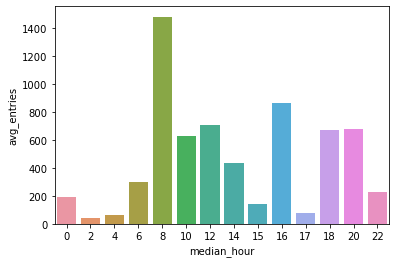

In [956]:
ax = sns.barplot(x='median_hour', y= 'avg_entries', data = penn_avgbyhour)

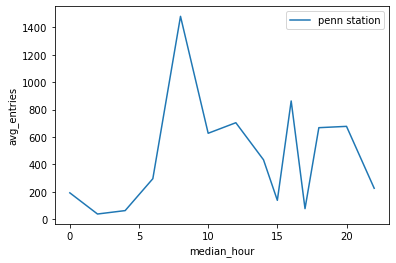

In [957]:
ax = sns.lineplot(x='median_hour', y= 'avg_entries', data = penn_avgbyhour, label='penn station')
ax.legend()

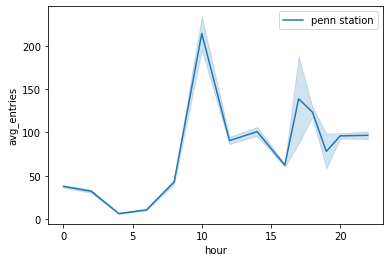

In [900]:
ax = sns.lineplot(x='hour', y= 'avg_entries', data = penn_filter2, label='penn station')
ax.legend()

In [961]:
penn_filter2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries,exits,DateTime,hour,time_span (hr),avg_entries,median_hour,day_of_week
50310,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,08:00:00,REGULAR,2017983,2033498,28.0,43.0,2018-05-12 08:00:00,8,4.0,7.00,6,5
50311,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,12:00:00,REGULAR,2018078,2033614,95.0,116.0,2018-05-12 12:00:00,12,4.0,23.75,10,5
50312,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,16:00:00,REGULAR,2018228,2033764,150.0,150.0,2018-05-12 16:00:00,16,4.0,37.50,14,5
50313,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/12/2018,20:00:00,REGULAR,2018333,2033921,105.0,157.0,2018-05-12 20:00:00,20,4.0,26.25,18,5
50314,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,05/13/2018,00:00:00,REGULAR,2018374,2033977,41.0,56.0,2018-05-13 00:00:00,0,4.0,10.25,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722622,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,02:00:00,REGULAR,67647948,17885259,74.0,43.0,2018-06-08 02:00:00,2,4.0,18.50,0,4
722624,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,10:00:00,REGULAR,67648048,17885784,100.0,498.0,2018-06-08 10:00:00,10,8.0,12.50,8,4
722625,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,14:00:00,REGULAR,67648214,17886067,166.0,283.0,2018-06-08 14:00:00,14,4.0,41.50,12,4
722626,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,06/08/2018,18:00:00,REGULAR,67648458,17886483,244.0,416.0,2018-06-08 18:00:00,18,4.0,61.00,16,4


In [959]:
penn_test = penn_filter2.groupby(["day_of_week","median_hour"]).mean()
penn_avgbyhour = pd.DataFrame(penn_test.groupby('median_hour').sum()).reset_index()
penn_avgbyhour

,median_hour,ENTRIES,EXITS,entries,exits,hour,time_span (hr),avg_entries
0,0,5.443706e+08,3.643062e+08,773.073042,566.809991,12.0,24.000000,193.268261
1,2,1.477111e+08,1.522263e+08,153.188639,109.214605,28.0,30.158585,38.926824
2,4,5.718177e+08,3.954160e+08,235.734851,198.821099,36.0,23.647673,63.824667
3,6,1.616016e+08,1.670703e+08,1176.501702,635.038860,56.0,29.135602,296.369366
4,8,6.645672e+08,4.295733e+08,5922.815333,1775.036061,70.0,31.074346,1480.285552
5,10,1.606881e+08,1.640687e+08,2511.261851,1862.864613,84.0,29.173904,627.657240
6,12,6.871032e+08,4.360860e+08,2818.587700,1971.414332,98.0,29.520020,704.594102
7,14,1.647332e+08,1.637189e+08,1726.697162,1913.804699,112.0,28.487465,434.221060
8,15,5.758091e+06,6.411991e+06,259.846154,610.230769,17.0,1.866004,138.738553
9,16,6.656031e+08,4.285957e+08,3385.937418,4296.943237,126.0,28.045195,863.161831


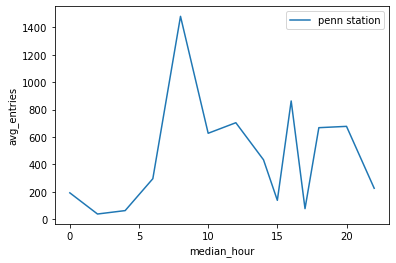

In [960]:
ax = sns.lineplot(x='median_hour', y= 'avg_entries', data = penn_avgbyhour, label='penn station')
ax.legend()

In [962]:
mta_2018_df.STATION.nunique()

375

## end of testing

In [747]:
mta_2018_df.entries.nlargest(500)

53398     2.122168e+09
250493    2.122146e+09
448067    2.122126e+09
644814    2.122106e+09
125516    2.104403e+09
              ...     
560792    2.606461e+08
757546    2.606381e+08
189310    2.600875e+08
387415    2.600613e+08
584154    2.600358e+08
Name: entries, Length: 500, dtype: float64

In [398]:
mta_2018_df.entries.min()

-2117426867.0

In [399]:
# find rows that don't make sense

In [400]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:>

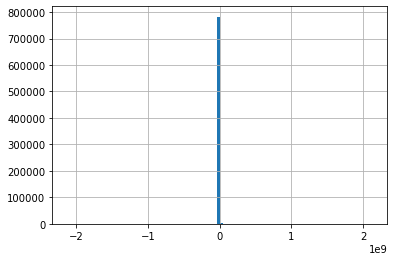

In [544]:
mta_2018_df['entries'].hist(bins=100)

<AxesSubplot:>

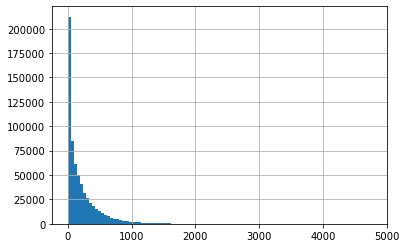

In [975]:
# focus on the majority; exclude outliers
mta_2018_filter_df = mta_2018_df.loc[(mta_2018_df.entries <5000) & (mta_2018_df.entries > 0)]
mta_2018_filter_df["entries"].hist(bins=100)

In [978]:
mta_2018_filter_df.entries.mean()

210.63154483847111

# Filter entries (make sense?)

In [804]:
# filter by entries < 3000
mta_2018_filter_df = mta_2018_df.loc[(mta_2018_df.entries <3000) & (mta_2018_df.entries > 0)].copy()

# Convert date and time

In [439]:
# convert DATE, TIME to datetime
mta_2018_filter_df['DateTime'] = pd.to_datetime(mta_2018_filter_df['DATE'] + " " + mta_2018_filter_df['TIME'])

# convert TIME to hour
mta_2018_filter_df['hour'] = pd.to_datetime(mta_2018_df['TIME'], format='%H:%M:%S').dt.hour

# Find daily entries

In [730]:
daily_entries_all = mta_2018_filter_df.groupby(mta_2018_filter_df['DateTime'].dt.date)['entries'].sum()

In [731]:
daily_entries_all_df = pd.DataFrame(daily_entries_all)

In [732]:
daily_entries_all_df.index = pd.to_datetime(daily_entries_all_df.index)

In [733]:
daily_entries_all_df['day_of_week'] = daily_entries_all_df.index.dayofweek

In [736]:
daily_entries_all_df.head()

,entries,day_of_week
DateTime,,
2018-05-12,2693061.0,5
2018-05-13,2455129.0,6
2018-05-14,5589478.0,0
2018-05-15,5995811.0,1
2018-05-16,6006845.0,2


In [539]:
# separte weekday/weekend
daily_entries_all_weekday = daily_entries_all_df[daily_entries_all_df['day_of_week'] < 5]
daily_entries_all_weekend = daily_entries_all_df[daily_entries_all_df['day_of_week'] >= 5]

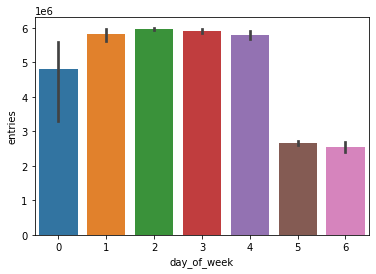

In [737]:
# find daily entries by day of week (for all stations)
# Do we want to combine ENTRIES and EXITS?
# Or separate analysis depend on locations and times (residential/commercial)?
# Or just focus on weekdays?
daily_entries_all_weekday
ax = sns.barplot(x='day_of_week', y= 'entries', data = daily_entries_all_df)

# Find daily entries for top 10 busy stations
### Need to integrate with supplementary data (filtered by zipcode later)?

In [738]:
daily_entries = mta_2018_filter_df.groupby(['STATION',mta_2018_filter_df['DateTime'].dt.date])['entries'].sum()

In [742]:
daily_entries

STATION    DateTime  
1 AV       2018-05-12    14273.0
           2018-05-13    14273.0
           2018-05-14    20305.0
           2018-05-15    22731.0
           2018-05-16    23475.0
                          ...   
ZEREGA AV  2018-06-04     2737.0
           2018-06-05     2789.0
           2018-06-06     2885.0
           2018-06-07     2671.0
           2018-06-08     2748.0
Name: entries, Length: 10411, dtype: float64

In [739]:
daily_entry_top10 = mta_2018_filter_df.groupby(['STATION','day_of_week'])['entries'].sum().groupby('STATION').mean().nlargest(10)

In [740]:
daily_entry_top10_df = pd.DataFrame(daily_entry_top10).reset_index()

In [741]:
daily_entry_top10_df

,STATION,entries
0,34 ST-PENN STA,516243.285714
1,GRD CNTRL-42 ST,427328.571429
2,23 ST,365432.285714
3,14 ST-UNION SQ,347446.285714
4,TIMES SQ-42 ST,346309.142857
5,34 ST-HERALD SQ,343552.714286
6,FULTON ST,321356.142857
7,42 ST-PORT AUTH,318983.428571
8,86 ST,286272.857143
9,125 ST,264174.571429


[Text(0, 0, '34 ST-PENN STA'),
 Text(1, 0, 'GRD CNTRL-42 ST'),
 Text(2, 0, '23 ST'),
 Text(3, 0, '14 ST-UNION SQ'),
 Text(4, 0, 'TIMES SQ-42 ST'),
 Text(5, 0, '34 ST-HERALD SQ'),
 Text(6, 0, 'FULTON ST'),
 Text(7, 0, '42 ST-PORT AUTH'),
 Text(8, 0, '86 ST'),
 Text(9, 0, '125 ST')]

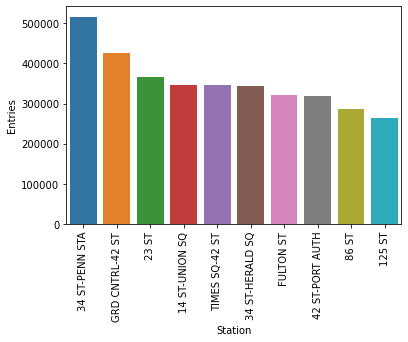

In [664]:
ax = sns.barplot(x = "STATION", y = "entries", data= daily_entry_top10_df)
ax.set_xlabel('Station')
ax.set_ylabel('Entries')
ax.set_xticklabels(daily_entry_top10_df.STATION, rotation=90)

### Does weekdays/weekends matter?

In [646]:
# Separate weekdays/weekends
daily_entries_df['day_of_week'] = daily_entries_df.datetime.dt.dayofweek
daily_entries_weekday = daily_entries_df[daily_entries_df['day_of_week'] < 5]
daily_entries_weekend = daily_entries_df[daily_entries_df['day_of_week'] >= 5]

In [715]:
# Find busy stations for weekdays
top10_weekday = daily_entries_weekday.groupby(['STATION'])['entries'].mean().nlargest(10)

In [716]:
pd.DataFrame(daily_entries_weekday.groupby(['STATION'])['entries'].mean())

,entries
STATION,
1 AV,22033.750000
103 ST,33425.050000
103 ST-CORONA,20097.650000
104 ST,3546.800000
110 ST,11376.600000
...,...
WOODHAVEN BLVD,25285.050000
WOODLAWN,7222.850000
WORLD TRADE CTR,18729.600000


In [717]:
top10_weekday_df = pd.DataFrame(top10_weekday).reset_index()

[Text(0, 0, '34 ST-PENN STA'),
 Text(1, 0, 'GRD CNTRL-42 ST'),
 Text(2, 0, '23 ST'),
 Text(3, 0, '34 ST-HERALD SQ'),
 Text(4, 0, 'TIMES SQ-42 ST'),
 Text(5, 0, 'FULTON ST'),
 Text(6, 0, '14 ST-UNION SQ'),
 Text(7, 0, '42 ST-PORT AUTH'),
 Text(8, 0, '86 ST'),
 Text(9, 0, '125 ST')]

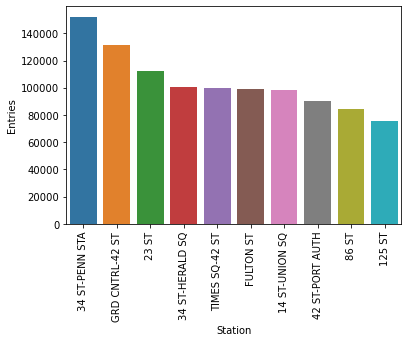

In [718]:
ax = sns.barplot(x = "STATION", y = "entries", data= top10_weekday_df)
ax.set_xlabel('Station')
ax.set_ylabel('Entries')
ax.set_xticklabels(top10_weekday_df.STATION, rotation=90)

In [719]:
# Find busy stations for weekends
top10_weekend = daily_entries_weekend.groupby(['STATION'])['entries'].mean().nlargest(10)

In [720]:
top10_weekend_df = pd.DataFrame(top10_weekend).reset_index()

[Text(0, 0, '34 ST-PENN STA'),
 Text(1, 0, '14 ST-UNION SQ'),
 Text(2, 0, 'TIMES SQ-42 ST'),
 Text(3, 0, '42 ST-PORT AUTH'),
 Text(4, 0, '34 ST-HERALD SQ'),
 Text(5, 0, 'CANAL ST'),
 Text(6, 0, 'GRD CNTRL-42 ST'),
 Text(7, 0, '125 ST'),
 Text(8, 0, '23 ST'),
 Text(9, 0, '86 ST')]

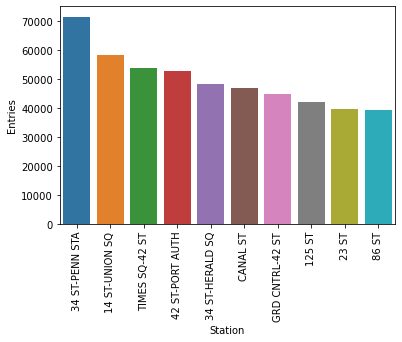

In [721]:
ax = sns.barplot(x = "STATION", y = "entries", data= top10_weekend_df)
ax.set_xlabel('Station')
ax.set_ylabel('Entries')
ax.set_xticklabels(top10_weekend_df.STATION, rotation=90)

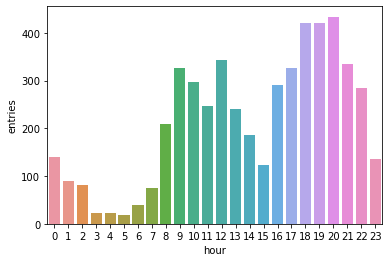

In [441]:
# find weekday entries by hours
weekday_hour = mta_2018_df_weekday.groupby("hour")['entries'].mean()
weekday_hour_df = pd.DataFrame(weekday_hour)
ax = sns.barplot(x=weekday_hour_df.index, y="entries", data=weekday_hour_df)

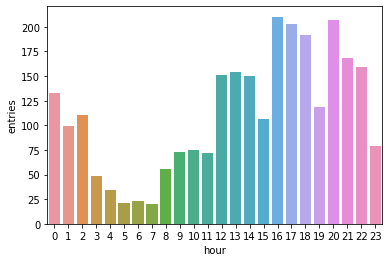

In [442]:
# find weekend entries by hours
weekend_hour = mta_2018_df_weekend.groupby("hour")['entries'].mean()
weekend_hour_df = pd.DataFrame(weekend_hour)
ax = sns.barplot(x=weekend_hour_df.index, y="entries", data=weekend_hour_df)

# Find average entries (entries per hour)

In [673]:
# find time_span (hr) for each row
# most are 4.0 hrs but some are not
mta_2018_filter_df['time_span (hr)'] = mta_2018_filter_df.DateTime.diff().apply(lambda x: x.total_seconds()/3600)

# find ave_entries (entries per hour)
mta_2018_filter_df['avg_entries'] = mta_2018_filter_df['entries']/ mta_2018_filter_df['time_span (hr)']

In [684]:
mta_2018_filter_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,entries,exits,DateTime,day_of_week,hour,time_span (hr),avg_entries
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,04:00:00,REGULAR,6616762,2242113,19.0,5.0,2018-05-12 04:00:00,5,4,NaN,NaN
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,08:00:00,REGULAR,6616781,2242144,19.0,31.0,2018-05-12 08:00:00,5,8,4.0,4.75
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,12:00:00,REGULAR,6616886,2242229,105.0,85.0,2018-05-12 12:00:00,5,12,4.0,26.25
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,16:00:00,REGULAR,6617105,2242278,219.0,49.0,2018-05-12 16:00:00,5,16,4.0,54.75
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/12/2018,20:00:00,REGULAR,6617402,2242328,297.0,50.0,2018-05-12 20:00:00,5,20,4.0,74.25


In [687]:
mta_2018_filter_df.avg_entries.max()

inf

In [471]:
# separte weekday/weekend
mta_2018_filter_df['day_of_week'] = mta_2018_filter_df['DateTime'].apply(lambda x: x.weekday())
mta_2018_df_weekday = mta_2018_filter_df[mta_2018_filter_df['day_of_week'] < 5]
mta_2018_df_weekend = mta_2018_filter_df[mta_2018_filter_df['day_of_week'] >= 5]

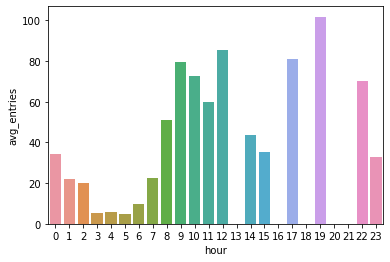

In [475]:
# find weekday avg_entries by hours
weekday_hour = mta_2018_df_weekday.groupby("hour")['avg_entries'].mean()
weekday_hour_df = pd.DataFrame(weekday_hour)
ax = sns.barplot(x=weekday_hour_df.index, y="avg_entries", data=weekday_hour_df)

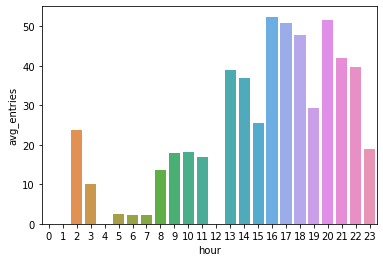

In [476]:
# find weekend avg_entries by hours
weekend_hour = mta_2018_df_weekend.groupby("hour")['avg_entries'].mean()
weekend_hour_df = pd.DataFrame(weekend_hour)
ax = sns.barplot(x=weekend_hour_df.index, y="avg_entries", data=weekend_hour_df)

In [ ]:
# check time_span and avg_entries make sense?

# Find top 10 stations (hour, entries)

In [693]:
weekday_hour_test = mta_2018_df_weekday.groupby(["STATION","hour"])['avg_entries'].mean()
weekday_hour_test_df = pd.DataFrame(weekday_hour_test).reset_index()

In [706]:
PENN_STA = weekday_hour_test_df[weekday_hour_test_df.STATION == '34 ST-PENN STA']
UNION_SQ = weekday_hour_test_df[weekday_hour_test_df.STATION == '14 ST-UNION SQ']
TIMES_SQ = weekday_hour_test_df[weekday_hour_test_df.STATION == 'TIMES SQ-42 ST']

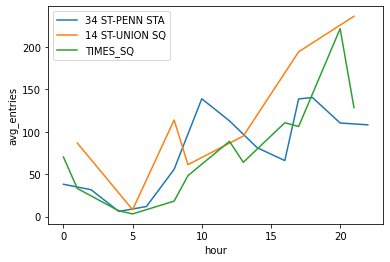

In [711]:
ax = sns.lineplot(x= 'hour', y="avg_entries", data=PENN_STA, label = '34 ST-PENN STA')
ax = sns.lineplot(x= 'hour', y="avg_entries", data=UNION_SQ, label = '14 ST-UNION SQ')
ax = sns.lineplot(x= 'hour', y="avg_entries", data=_23_ST, label = 'TIMES_SQ')
ax.legend()

# Random trials
## Find busy stations
### Need to integrate with supplementary data by zipcode later?

[Text(0, 0, 'YORK ST'),
 Text(1, 0, 'ASTORIA DITMARS'),
 Text(2, 0, 'MYRTLE AV'),
 Text(3, 0, 'GATES AV'),
 Text(4, 0, '14 ST-UNION SQ')]

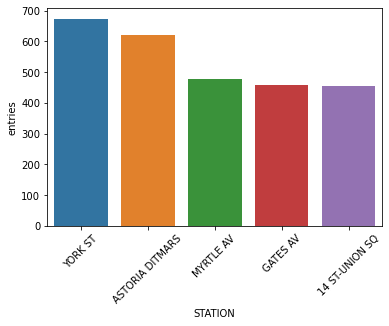

In [496]:
# find busiest stations on weekdays
weekday_station = mta_2018_df_weekday.groupby("STATION")['entries'].mean().nlargest(5)
weekday_station_df = pd.DataFrame(weekday_station)
ax = sns.barplot(x=weekday_station_df.index, y="entries", data=weekday_station_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'QUEENSBORO PLZ'),
 Text(1, 0, 'RIT-MANHATTAN'),
 Text(2, 0, 'BEDFORD AV'),
 Text(3, 0, '8 AV'),
 Text(4, 0, '57 ST-7 AV')]

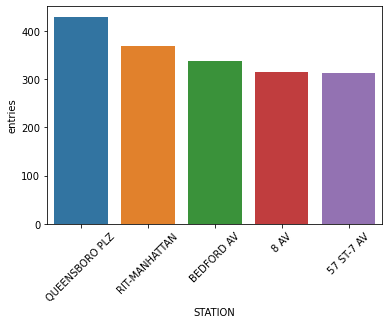

In [490]:
# find busiest stations on weekdays
weekend_station = mta_2018_df_weekend.groupby("STATION")['entries'].mean().nlargest(5)
weekend_station_df = pd.DataFrame(weekend_station)
ax = sns.barplot(x=weekend_station_df.index, y="entries", data=weekend_station_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [480]:
weekday_station= mta_2018_df_weekday.groupby("STATION")['avg_entries'].mean().nlargest(5)

In [481]:
weekday_station

STATION
231 ST             inf
28 ST              inf
JAY ST-METROTEC    inf
MARCY AV           inf
ST. GEORGE         inf
Name: avg_entries, dtype: float64

# test

In [268]:
mta_2018_filter_df.drop(columns=['entries','exits'],inplace=True)

In [270]:
mta_2018_df.drop(columns=['entries','exits'],inplace=True)

In [272]:
mta_2018_df.drop(columns=['day_of_week','hour'],inplace=True)

In [ ]:
mta_2018_filter_df.drop(columns=['day_of_week','hour'],inplace=True)

In [357]:
from datetime import datetime

In [369]:
dt1 = datetime(2018,6,8,21,0,0)

In [367]:
dt2 = datetime(2018,6,9,1,0,0)

In [416]:
dt1.weekday()

4

In [377]:
span = dt2 - dt1

In [380]:
span.total_seconds()/3600

4.0

In [383]:
mta_2018_filter_df['DESC']+mta_2018_filter_df['TIME']

1         REGULAR04:00:00
2         REGULAR08:00:00
3         REGULAR12:00:00
4         REGULAR16:00:00
5         REGULAR20:00:00
               ...       
788281    REGULAR05:00:00
788282    REGULAR09:00:00
788283    REGULAR13:00:00
788284    REGULAR17:00:00
788285    REGULAR21:00:00
Length: 644287, dtype: object

<AxesSubplot:xlabel='day_of_week', ylabel='ENTRIES'>

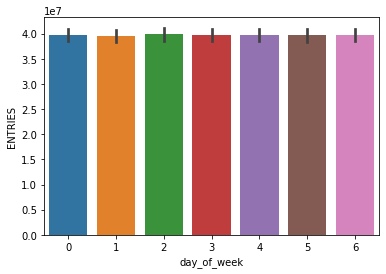

In [191]:
# find ENTRIES by day of week
sns.barplot(x='day_of_week', y= 'ENTRIES', data=mta_2018_df)

In [185]:
# find busiest stations on weekdays/weekends

mta_2018_df_weekday_top5 = mta_2018_df_weekday.groupby(['STATION'])["ENTRIES"].mean().nlargest(5)
mta_2018_df_weekend_top5 = mta_2018_df_weekend.groupby(['STATION'])["ENTRIES"].mean().nlargest(5)

In [186]:
mta_2018_df_weekday_top5

STATION
YORK ST          1.299039e+07
PARKSIDE AV      1.273928e+07
NEWKIRK PLAZA    1.117855e+07
KINGSTON AV      1.105292e+07
MYRTLE AV        9.595015e+06
Name: ENTRIES, dtype: float64

In [ ]:
plt.hist(x='STATION', data=)

In [187]:
mta_2018_df_weekend_top5

STATION
YORK ST          1.298173e+07
PARKSIDE AV      1.273250e+07
NEWKIRK PLAZA    1.117207e+07
KINGSTON AV      1.106324e+07
MYRTLE AV        9.584656e+06
Name: ENTRIES, dtype: float64

In [ ]:
# convert TIME to hour
mta_2018_filter_df['hour'] = pd.to_datetime(mta_2018_df['TIME'], format='%H:%M:%S').dt.hour

[Text(0, 0, '34 ST-PENN STA'),
 Text(1, 0, 'GRD CNTRL-42 ST'),
 Text(2, 0, '23 ST'),
 Text(3, 0, '14 ST-UNION SQ'),
 Text(4, 0, 'TIMES SQ-42 ST'),
 Text(5, 0, '34 ST-HERALD SQ'),
 Text(6, 0, 'FULTON ST'),
 Text(7, 0, '42 ST-PORT AUTH'),
 Text(8, 0, '86 ST'),
 Text(9, 0, '125 ST')]

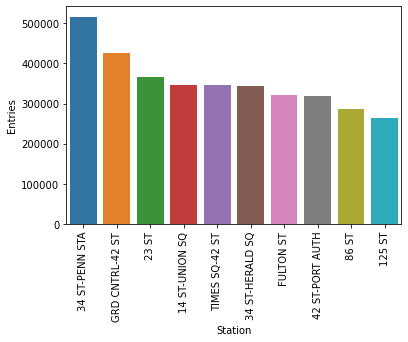

In [665]:
ax = sns.barplot(x = daily_entry_top10.index, y = daily_entry_top10.values[::-1], data= daily_entry_top10)
ax.set_xlabel('Station')
ax.set_ylabel('Entries')
ax.set_xticklabels(daily_entry_top10.index, rotation=90)